In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sc
import seaborn as sns

In [3]:
data=pd.read_csv("Downloads/download.csv")

In [4]:
data.head()

,date,datetime,cash_type,card,money,coffee_name,Quantity,Sale
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,8,309.6
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,17,657.9
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,7,270.9
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,18,520.2
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,17,657.9


In [5]:
df=pd.DataFrame(data)

In [7]:
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
Quantity         int64
Sale           float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
 6   Quantity     1133 non-null   int64  
 7   Sale         1133 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 70.9+ KB


In [10]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
Quantity        0
Sale            0
dtype: int64

In [14]:
df.drop_duplicates()

,date,datetime,cash_type,card,money,coffee_name,Quantity,Sale
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,8,309.60
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,17,657.90
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,7,270.90
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,18,520.20
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,17,657.90
...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,16,368.32
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,1,27.92
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,17,557.94
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,1,32.82


In [15]:
df['datetime']=pd.to_datetime(df['datetime'])

In [17]:
df['month']=df['datetime'].dt.month
df['hour']=df['datetime'].dt.hour
df['day']=df['datetime'].dt.strftime('%w')

In [18]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,Quantity,Sale,month,hour,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,8,309.6,3,10,5
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,17,657.9,3,12,5
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,7,270.9,3,12,5
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,18,520.2,3,13,5
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,17,657.9,3,13,5


In [23]:
df[df['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

In [25]:
df.head(13)


,date,datetime,cash_type,card,money,coffee_name,Quantity,Sale,month,hour,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,8,309.6,3,10,5
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,17,657.9,3,12,5
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,7,270.9,3,12,5
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,18,520.2,3,13,5
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,17,657.9,3,13,5
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk,15,507.0,3,15,5
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,19,735.3,3,16,5
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk,4,135.2,3,18,5
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,5,193.5,3,19,5
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk,14,473.2,3,19,5


In [ ]:
#counting total sales from  particular customers through cardID

In [27]:

# Display the unique values in 'cash_type' and 'card' before the operation
print("Unique values in 'cash_type' before operation:", df['cash_type'].unique())
print("Unique values in 'card' before operation (sample):", df['card'].value_counts().head())

# Fill '0' in the 'card' column for rows where 'cash_type' is 'cash'
df.loc[df['cash_type'] == 'cash', 'card'] = '0'

# Display the unique values in 'card' after the operation to verify
print("\nUnique values in 'cash_type' after operation:", df['cash_type'].unique())
print("Unique values in 'card' after operation (sample):", df['card'].value_counts().head())


# Display a sample of rows where 'cash_type' is 'cash' to verify the change
print("\nSample rows where 'cash_type' is 'cash' after modification:")
print(df[df['cash_type'] == 'cash'][['cash_type', 'card']].head())

Unique values in 'cash_type' before operation: ['card' 'cash']
Unique values in 'card' before operation (sample): card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
Name: count, dtype: int64

Unique values in 'cash_type' after operation: ['card' 'cash']
Unique values in 'card' after operation (sample): card
0                      89
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
Name: count, dtype: int64

Sample rows where 'cash_type' is 'cash' after modification:
   cash_type card
12      cash    0
18      cash    0
41      cash    0
46      cash    0
49      cash    0


In [28]:
df.head(13)

,date,datetime,cash_type,card,money,coffee_name,Quantity,Sale,month,hour,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,8,309.6,3,10,5
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,17,657.9,3,12,5
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,7,270.9,3,12,5
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,18,520.2,3,13,5
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,17,657.9,3,13,5
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk,15,507.0,3,15,5
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,19,735.3,3,16,5
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk,4,135.2,3,18,5
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,5,193.5,3,19,5
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk,14,473.2,3,19,5


In [35]:
df['coffee_name'].value_counts(normalize=False)


coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64

In [42]:
df['Sale']=df['Sale'].astype(int)

C:\Users\91952\AppData\Local\Temp\ipykernel_14052\4033349464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,y='Sale',x='coffee_name',palette='viridis')


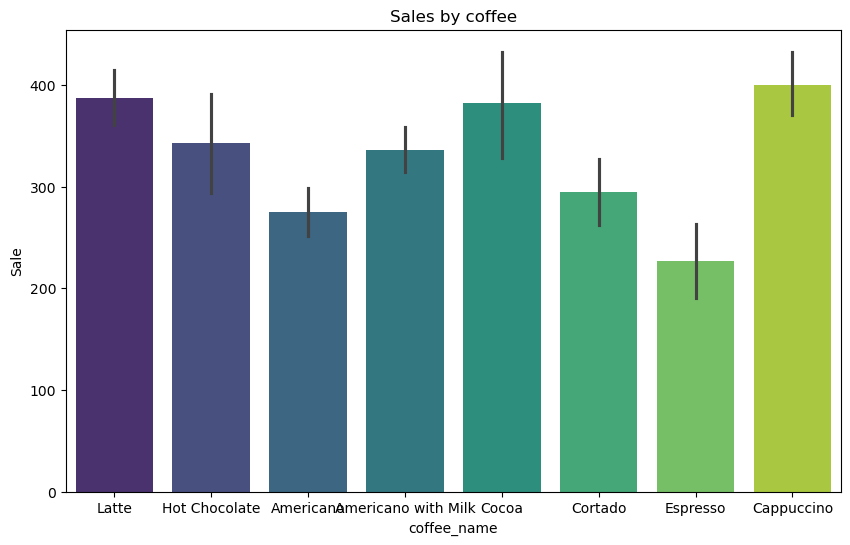

In [46]:
plt.figure(figsize=(10 , 6))
sns.barplot(data=df,y='Sale',x='coffee_name',palette='viridis')
plt.title('Sales by coffee')
plt.show()

In [50]:
sales_and_counts_by_coffee_type = df.groupby('coffee_name').agg(
    Total_Sales=('Sale', 'sum'),
    Transaction_Count=('Sale', 'count') # Count of sales records/transactions
)

# Sort the result by 'Total_Sales' in descending order
sales_and_counts_by_coffee_type = sales_and_counts_by_coffee_type.sort_values(by='Total_Sales', ascending=False)

# Display the result
print("Total Sales and Transaction Count for each Coffee Type:")
print(sales_and_counts_by_coffee_type)

Total Sales and Transaction Count for each Coffee Type:
                     Total_Sales  Transaction_Count
coffee_name                                        
Latte                      94063                243
Americano with Milk        90059                268
Cappuccino                 78309                196
Americano                  46531                169
Cortado                    29138                 99
Hot Chocolate              25361                 74
Cocoa                      13366                 35
Espresso                   11093                 49


In [56]:
cnbyccount=df.groupby(['card','coffee_name']).size().unstack(fill_value=0)

In [57]:
print("Count of each coffee type by card:")
print(cnbyccount)

Count of each coffee type by card:
coffee_name          Americano  Americano with Milk  Cappuccino  Cocoa  \
card                                                                     
0                           14                   15          15      4   
ANON-0000-0000-0001          0                    0           0      0   
ANON-0000-0000-0002          0                    0           0      0   
ANON-0000-0000-0003         17                    1           0      0   
ANON-0000-0000-0004          4                    4           0      0   
...                        ...                  ...         ...    ...   
ANON-0000-0000-0442          0                    0           0      1   
ANON-0000-0000-0443          0                    0           0      0   
ANON-0000-0000-0444          0                    0           0      0   
ANON-0000-0000-0445          0                    0           0      0   
ANON-0000-0000-0446          0                    0           0      0   

co

In [61]:
monthly_sales =df.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales


coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,36,34,20,6,30,10,22,48
1,4,35,42,43,6,19,7,13,31
2,5,48,58,55,9,17,8,14,58
3,6,14,69,46,5,19,10,14,50
4,7,36,65,32,9,14,14,11,56


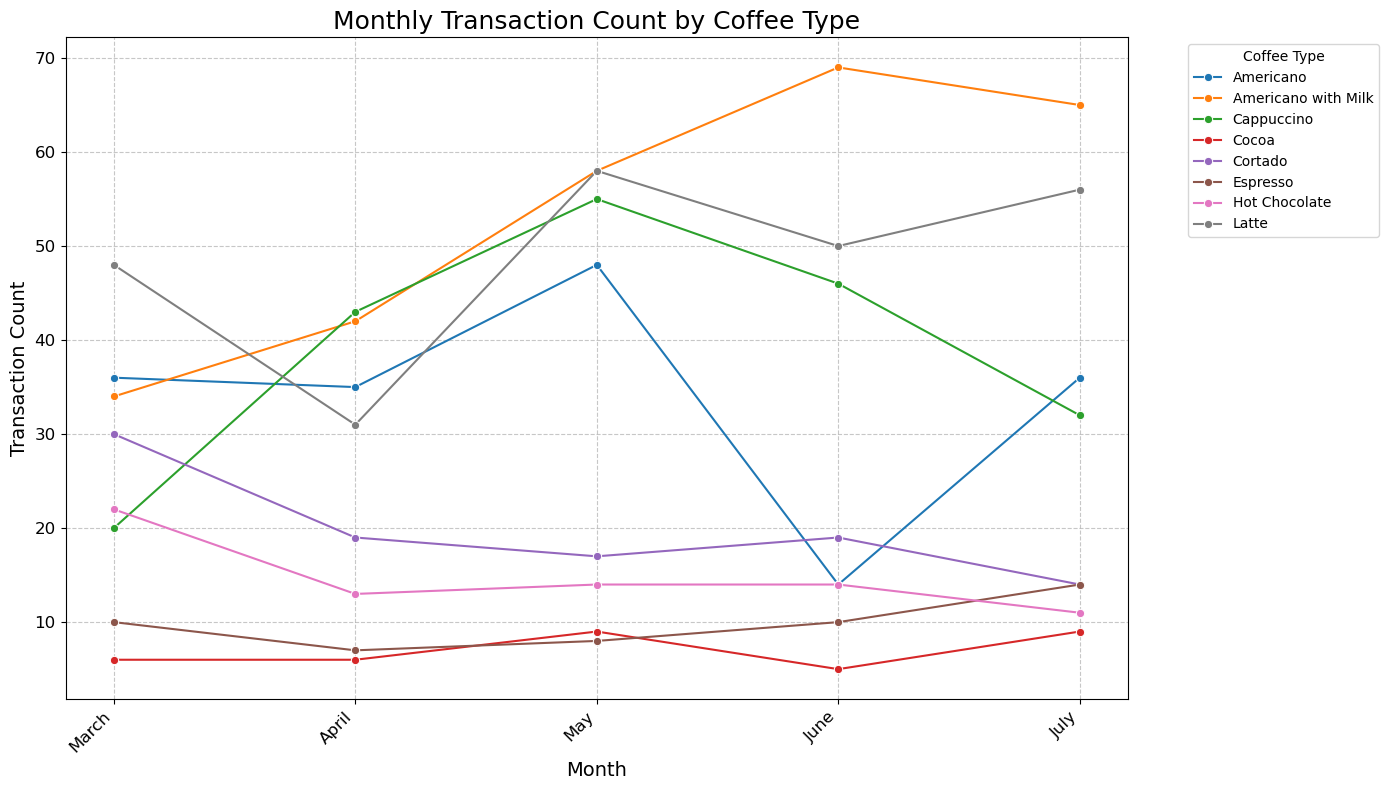

In [62]:
df['Month'] = df['datetime'].dt.month
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['Month_Name'] = df['Month'].map(month_names)

# Group by 'Month', 'Month_Name' and 'coffee_name' to get the monthly counts
monthly_counts_df = df.groupby(['Month', 'Month_Name', 'coffee_name']).agg(
    Transaction_Count=('Sale', 'count')
).reset_index()

# Sort by month for correct line plot order
monthly_counts_df = monthly_counts_df.sort_values(by='Month', ascending=True)

# Create the line chart
plt.figure(figsize=(14, 8)) # Adjust figure size for better readability

sns.lineplot(
    x='Month_Name',
    y='Transaction_Count',
    hue='coffee_name',
    data=monthly_counts_df,
    marker='o' # Add markers for each data point
)

# Set title and labels
plt.title('Monthly Transaction Count by Coffee Type', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Place legend outside the plot for better visibility if many lines
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for easier reading
plt.tight_layout() # Adjust layout to prevent labels from being cut off

plt.show()

In [68]:
daily_sales =df.groupby(['coffee_name','date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [70]:
daily_sales.describe()

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.126667,1.786667,1.306667,0.233333,0.660000,0.326667,0.493333,1.620000
std,1.216755,1.751650,1.360747,0.483509,0.932846,0.660452,0.888001,1.359382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,5.000000,12.000000,9.000000,2.000000,4.000000,4.000000,4.000000,7.000000


In [71]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


In [72]:
min_max=daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

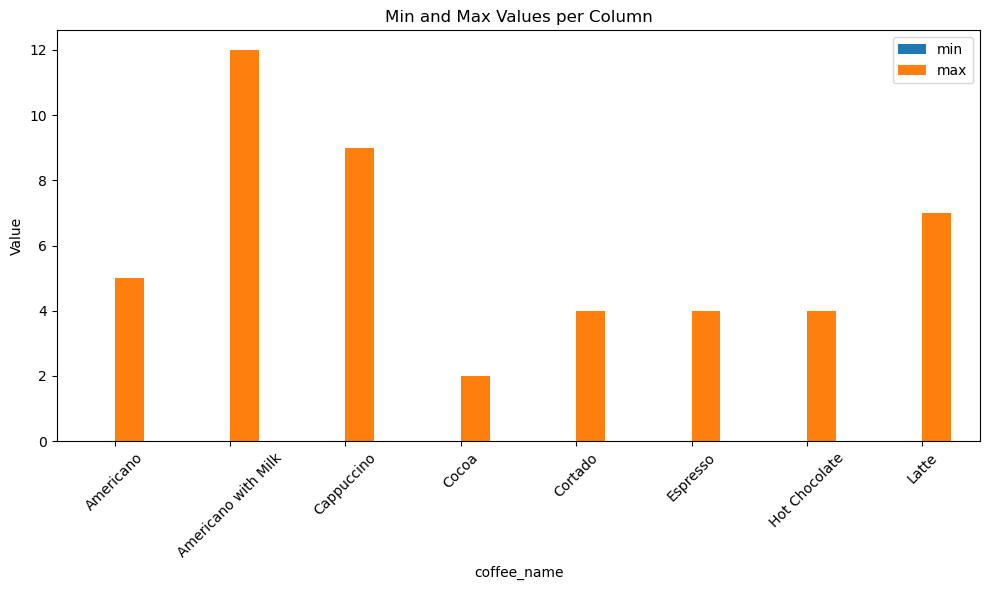

In [73]:
min_max.plot(kind='bar', figsize=(10, 6))
plt.title('Min and Max Values per Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
hourly_sales=df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date' : 'count'})
hourly_sales

,hour,count
0,7,13
1,8,44
2,9,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


In [81]:
hourly_sales=df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,7,13
1,8,44
2,9,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


C:\Users\91952\AppData\Local\Temp\ipykernel_14052\3687609292.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_sales,x='hour',y='count',palette="viridis")


<Axes: xlabel='hour', ylabel='count'>

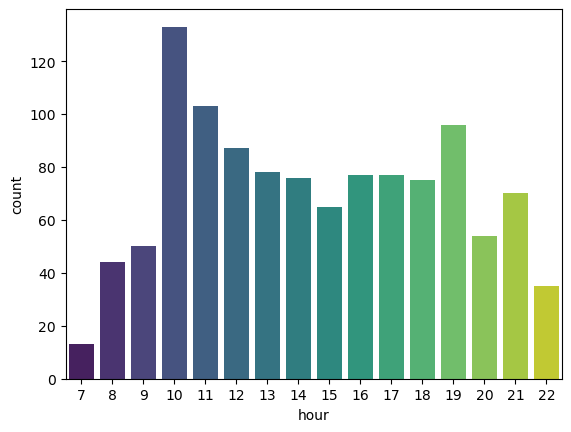

In [86]:
sns.barplot(data=hourly_sales,x='hour',y='count',palette="viridis")

In [87]:
hourly_sales_by_coffee=df.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,7,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,8,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,9,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


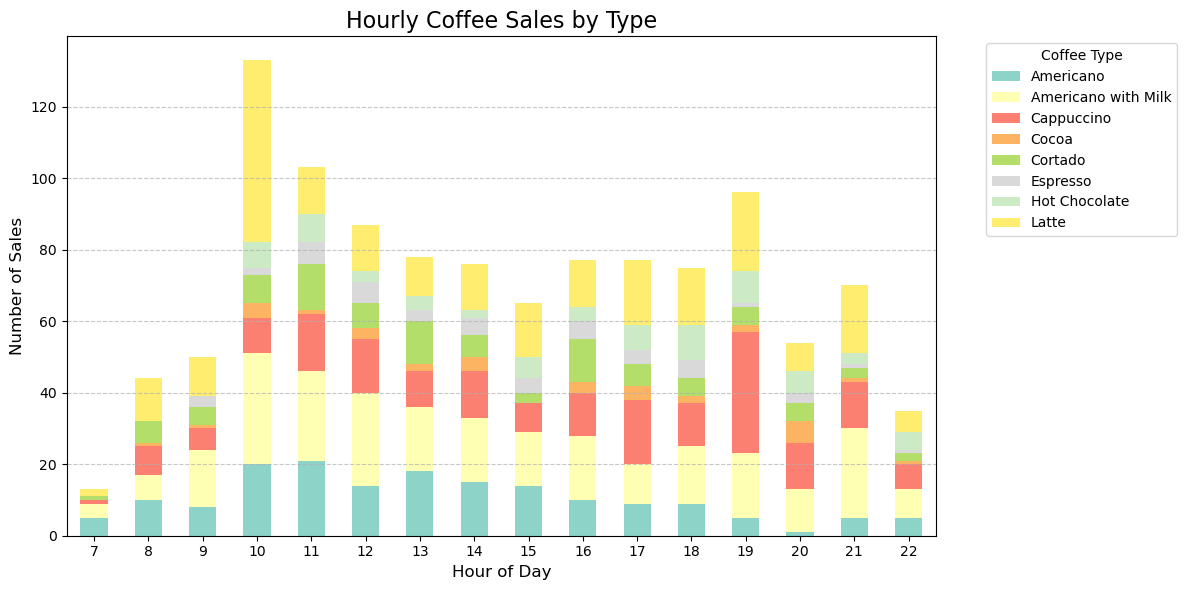

In [88]:
hourly_sales_by_coffee.set_index('hour').plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set3'  # Optional: use a nice color palette
)

plt.title('Hourly Coffee Sales by Type', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

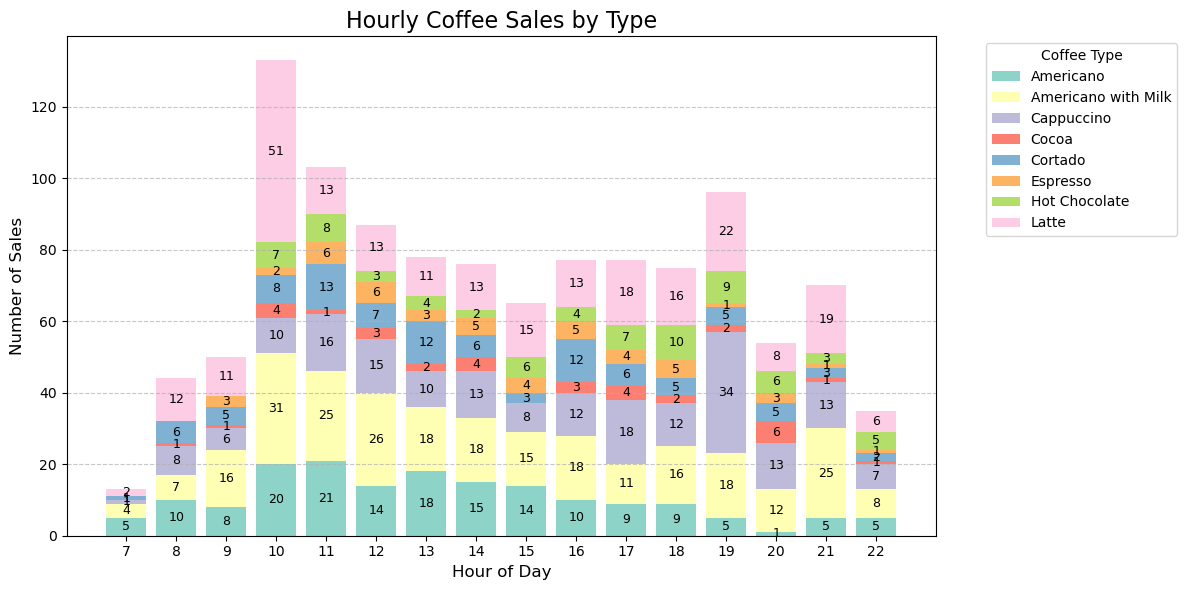

In [89]:
import matplotlib.pyplot as plt

# Set up plot
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data
data = hourly_sales_by_coffee.set_index('hour')
colors = plt.cm.Set3.colors  # Optional color palette

# Plot each coffee type one by one for stacking
bottom = [0] * len(data)
for i, column in enumerate(data.columns):
    bars = ax.bar(data.index, data[column], bottom=bottom, label=column, color=colors[i % len(colors)])
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                int(height),
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
    
    # Update bottom for next stack
    bottom = [bottom[j] + data[column].iloc[j] for j in range(len(data))]

# Decorations
ax.set_title('Hourly Coffee Sales by Type', fontsize=16)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Number of Sales', fontsize=12)
ax.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticks(data.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
#PREDICTING NEXT DAY,WEEK AND MONTH SALE

In [ ]:
# Using Ridge linear Regression

In [1]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=['cash_type', 'card', 'coffee_name'], drop_first=True)

# Feature scaling
scaler = StandardScaler()
x = df_encoded.drop(columns=['Sale'])
x_scaled = scaler.fit_transform(x)

# Target variable
y = df_encoded['Sale']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Use Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

# Predictions
y_pred = ridge_model.predict(x_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


NameError: name 'df' is not defined

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


In [ ]:
#dropping unnecessory columns leading model memorization 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Drop unnecessary columns
df_cleaned = df.drop(columns=['card'])

# 2. One-hot encode remaining categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['cash_type', 'coffee_name'], drop_first=True)

# 3. Define features and target
X = df_encoded.drop(columns=['Sale'])
y = df_encoded['Sale']

# 4. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and train Ridge regression
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 6. Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


In [ ]:
# Get feature importance
coefficients = pd.Series(model.coef_, index=X.columns)
print("Top positive coefficients:")
print(coefficients.sort_values(ascending=False).head())

print("\nTop negative coefficients:")
print(coefficients.sort_values().head())


In [ ]:
# Example input
new_data = {
    'money': 30.50,
    'Quantity': 26,
    'cash_type_Credit': 0,  # set 1 if credit, else 0
    'coffee_name_Cappuccino': 5,
    'coffee_name_Espresso': 2,
    # ... add all other one-hot columns with 0 if not selected
}

# Convert to DataFrame with same columns
new_input = pd.DataFrame([new_data])
# Reindex to match training feature columns (fill missing with 0)
new_input = new_input.reindex(columns=X.columns, fill_value=0)

# Predict
predicted_sale = model.predict(new_input)
print(f"Predicted Sale Amount: {predicted_sale[0]:.2f}")


In [ ]:
# Example input
new_data = {
    'money': 30.50,
    'Quantity': 26,
    'cash_type_Credit': 0,  # set 1 if credit, else 0
    'coffee_name_Cappuccino': 5,
    'coffee_name_Espresso': 2,
    # ... add all other one-hot columns with 0 if not selected
}

# Convert to DataFrame with same columns
new_input = pd.DataFrame([new_data])
# Reindex to match training feature columns (fill missing with 0)
new_input = new_input.reindex(columns=X.columns, fill_value=0)

# Predict
predicted_sale = model.predict(new_input)
print(f"Predicted Sale Amount: {predicted_sale[0]:.2f}")


In [ ]:
#next week prdiction

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# How many past weeks to compare
n = 8

# Step 1: Actual values from last 8 weeks
actual = weekly_sales[-n:]

# Step 2: Exogenous variables for the same 8 weeks
exog_actual = exog[-n:]

# Step 3: Predicted values
predicted = results.get_prediction(start=actual.index[0], end=actual.index[-1], exog=exog_actual).predicted_mean

# Step 4: Calculate MSE
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")


In [ ]:
# Print all model coefficients
print(results.summary())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Step 1: Extract all model coefficients
coefs = results.params

# Step 2: Define regex pattern for exogenous variable names
# (adjust pattern based on your actual feature column names)
pattern = re.compile(r'(coffee_name|Quantity|cash_type|card|money|week)', re.IGNORECASE)

# Step 3: Filter parameters that match exogenous variable names
exog_coefs = coefs[coefs.index.to_series().str.contains(pattern)]

# Step 4: Plot absolute values as feature importance
plt.figure(figsize=(10, 6))
exog_coefs.abs().sort_values().plot(kind='barh', color='skyblue')
plt.title('📊 Feature Importance from SARIMAX Coefficients')
plt.xlabel('Coefficient Magnitude (Absolute)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print raw coefficients
print("\n📃 Raw Coefficients of Exogenous Features:")
print(exog_coefs)


In [ ]:
#next month sale prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and parse date
df = pd.read_csv('download.csv')
df['date'] = pd.to_datetime(df['date'])

# Group by month
df['month_start'] = df['date'].values.astype('datetime64[M]')
monthly_sales = df.groupby('month_start')['Sale'].sum()

# Plot monthly sales
monthly_sales.plot(figsize=(10,4), title='Monthly Sales')
plt.grid(True)
plt.show()

# Fit auto_arima model
model = auto_arima(monthly_sales, seasonal=True, m=7, trace=True, stepwise=True)
print(model.summary())

# Forecast next 3 months
n_periods = 3
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
future_dates = pd.date_range(monthly_sales.index[-1] + pd.offsets.MonthBegin(),
                             periods=n_periods, freq='MS')

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label='Observed')
plt.plot(future_dates, forecast, label='Forecast', color='orange')
plt.fill_between(future_dates, conf_int[:,0], conf_int[:,1], color='orange', alpha=0.3)
plt.title('Auto ARIMA Forecast: Monthly Sales')
plt.legend()
plt.grid(True)
plt.show()

# Show forecasted values
forecast_df = pd.DataFrame({'Month': future_dates, 'Forecast': forecast})
print("\n📅 Forecasted Sales for Next 3 Months:")
print(forecast_df)


In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume 'monthly_features' is a DataFrame that includes:
# 'Quantity', 'card', 'cash_type', 'coffee_name', and 'money'

# 1. Define features and target
X = monthly_features.drop(columns='money')
y = monthly_features['money']

# 2. Define categorical and numerical columns
categorical_cols = ['cash_type', 'coffee_name']
numerical_cols = ['Quantity', 'card']

# 3. Preprocessing: OneHotEncode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as-is
)

# 4. Build pipeline with Ridge Regression
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# 5. Train on all but last month
ridge_model.fit(X.iloc[:-1], y.iloc[:-1])

# 6. Predict the next month (based on last available month’s features)
predicted_sale = ridge_model.predict(X.iloc[[-1]])[0]

# 7. Output result
print(f"📅 Predicted sale for next month: ₹{predicted_sale:,.2f}")
